In [43]:
!pip install librosa numpy matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display


In [45]:
# Load the audio file
audio_path = 'output.wav'
audio, sr = librosa.load(audio_path)

In [46]:
# Compute the short-time Fourier transform (STFT) to obtain the spectrogram
stft = librosa.stft(audio)

# Compute the Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(y=audio, sr=sr)

# Compute the pitch.
pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)

# Convert the magnitudes to decibels
magnitudes_db = librosa.amplitude_to_db(magnitudes)

# Create a time array for x-axis
frames = range(pitches.shape[1])
t = librosa.frames_to_time(frames, sr=sr)
    
# Compute the RMS energy
rms = librosa.feature.rms(y=audio, frame_length=len(audio)//100)
time_rms = librosa.frames_to_time(np.arange(len(rms[0])), sr=sr)

# Compute the confidence interval
confidence = np.mean(stft, axis=0) - np.std(stft, axis=0)
time_confidence = librosa.frames_to_time(np.arange(len(confidence)), sr=sr)

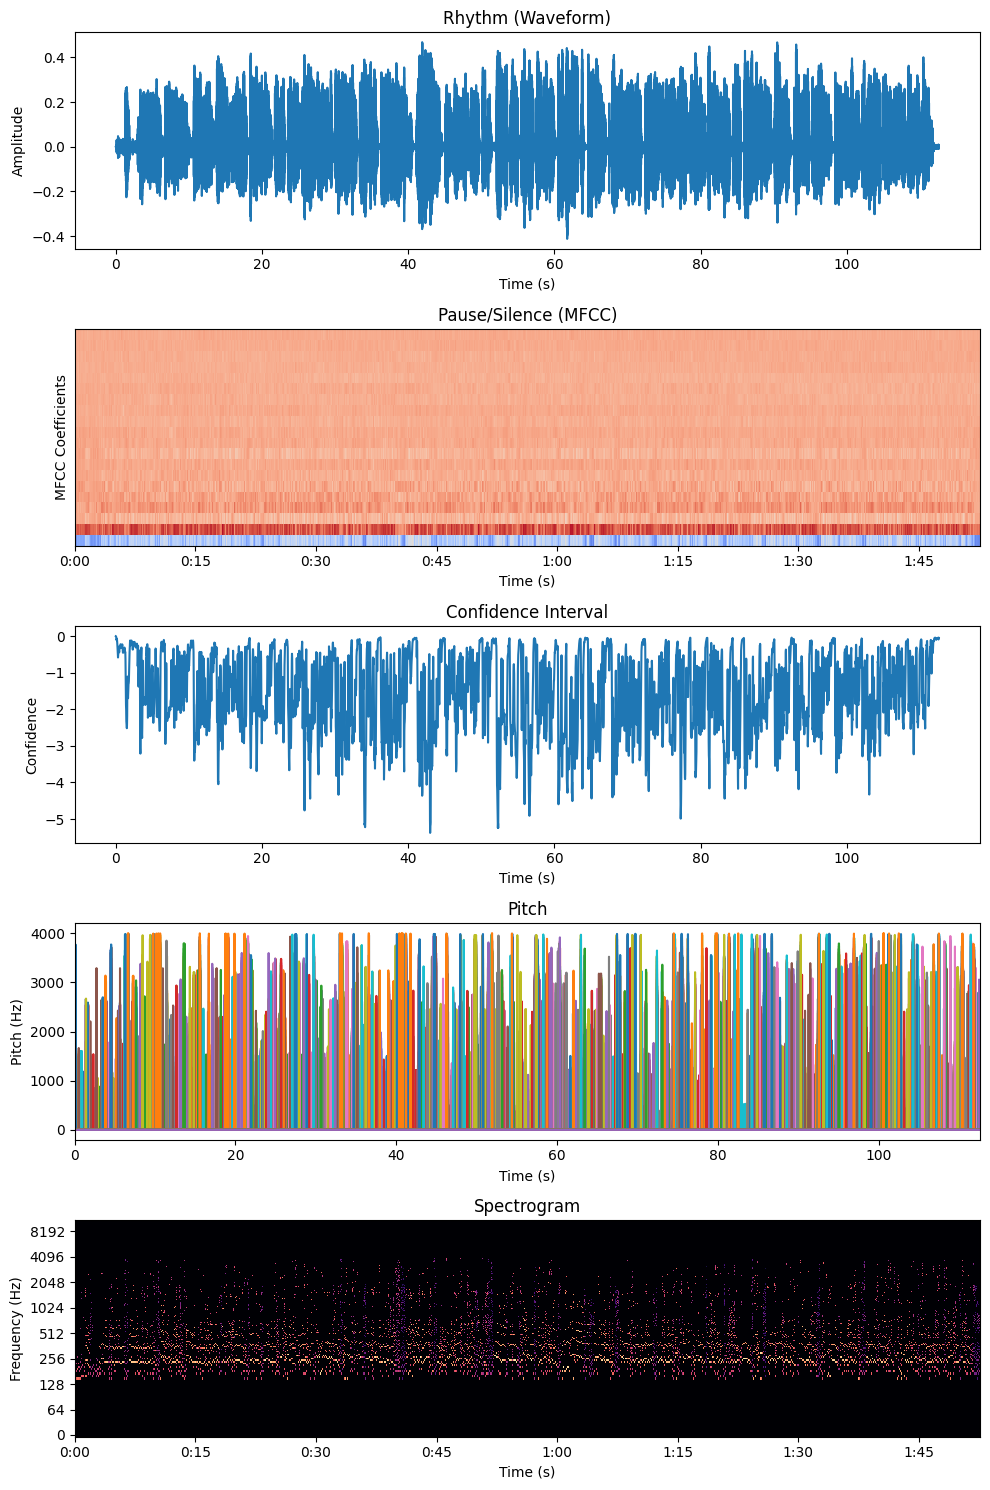

In [47]:
# Create subplots for each feature
fig, axs = plt.subplots(5, 1, figsize=(10, 15), sharex=False)

# Plot rhythm (waveform)
axs[0].plot(np.linspace(0, len(audio)/sr, len(audio)), audio)
axs[0].set(title='Rhythm (Waveform)', xlabel='Time (s)', ylabel='Amplitude')

# Plot pause/silence (MFCC)
librosa.display.specshow(mfcc, x_axis='time', ax=axs[1])
axs[1].set(title='Pause/Silence (MFCC)', xlabel='Time (s)', ylabel='MFCC Coefficients')

# Plot confidence interval
axs[2].plot(time_confidence, confidence)
axs[2].set(title='Confidence Interval', xlabel='Time (s)', ylabel='Confidence')

axs[3].plot(t, pitches.T, label='Pitch (Hz)')
axs[3].set(title='Pitch', xlabel='Time (s)', ylabel='Pitch (Hz)')
axs[3].set_xlim(0, len(audio) / sr)

librosa.display.specshow(magnitudes_db, sr=sr, x_axis='time', y_axis='log')
axs[4].set(title='Spectrogram', xlabel='Time (s)', ylabel='Frequency (Hz)')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()